In [20]:
import json
with open('../../data/metadata_postgres.json', 'r') as f:
    metadata = json.load(f)

In [21]:
datasets = 0
tables = 0
column_names = []
pks = 0
pk_composites = []
pk_names = []
pk_counts = []
fks = 0
fk_counts = []
fk_names = []
fk_ref_names = []
fk_full_ref_names = []
for dataset in metadata.keys():
    datasets += 1
    tables += len(metadata[dataset]["TABLES"])
    for table in metadata[dataset]["TABLES"].keys():
        column_names.extend([col[0] for col in metadata[dataset]["TABLES"][table]["COLUMNS"]])
        pks += len(metadata[dataset]["TABLES"][table]["PRIMARY_KEYS"])
        pk_names.extend(metadata[dataset]["TABLES"][table]["PRIMARY_KEYS"])
        pk_counts.append(len(metadata[dataset]["TABLES"][table]["PRIMARY_KEYS"]))
        pk_composites.append(', '.join(metadata[dataset]["TABLES"][table]["PRIMARY_KEYS"]))
        fks += len(metadata[dataset]["TABLES"][table]["FOREIGN_KEYS"])
        fk_counts.append(len([k['FOREIGN_KEY'] for k in metadata[dataset]["TABLES"][table]["FOREIGN_KEYS"]]))
        fk_names.extend([k['FOREIGN_KEY'] for k in metadata[dataset]["TABLES"][table]["FOREIGN_KEYS"]])
        for fk in metadata[dataset]["TABLES"][table]["FOREIGN_KEYS"]:
            rt = fk['REFERENCE_TABLE']
            rcs = fk['REFERENCE_COLUMN']
            for rc in rcs:
                fk_full_ref_names.append(f"{rt}.{rc}")
        fk_ref_names.extend([k['REFERENCE_COLUMN'] for k in metadata[dataset]["TABLES"][table]["FOREIGN_KEYS"]])
    if datasets % 10000 == 0 or datasets == len(metadata.keys()):
        print(f"datasets: {datasets}, tables: {tables}, columns: {len(column_names)}, primary_keys: {pks}, foreign_keys: {fks}", end="\r")

In [22]:
fk_counts_per_table = []
fk_names_flat = []
for fks in fk_names:
    fk_counts_per_table.append(len(fks))
    for fk in fks:
        fk_names_flat.append(fk)
        
fk_ref_names_flat = []
for fks in fk_ref_names:
    for fk in fks:
        fk_ref_names_flat.append(fk)

In [23]:
from matplotlib import pyplot as plt
import collections

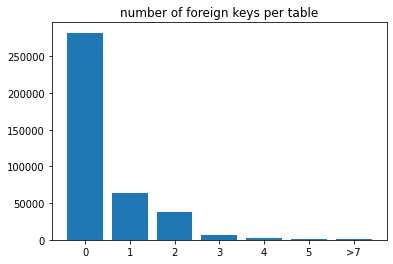

In [24]:
# fk's per table
counter = collections.Counter(fk_counts)
most_common = counter.most_common()

cutoff = 6
most_common[cutoff] = (f">{most_common[cutoff][0]}", sum([kv[1] for kv in most_common[cutoff:]]))
most_common = most_common[:cutoff+1]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("number of foreign keys per table")
plt.bar(x, y)
plt.show()

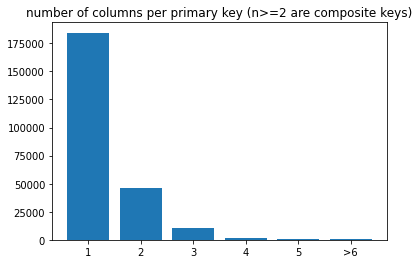

In [25]:
# composite pks per table
counter = collections.Counter(pk_counts)
most_common = counter.most_common()
most_common = sorted(most_common, key=lambda x: x[0])

cutoff = 6
most_common[cutoff] = (f">{most_common[cutoff][0]}", sum([kv[1] for kv in most_common[cutoff:]]))
most_common = most_common[1:cutoff+1]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("number of columns per primary key (n>=2 are composite keys)")
plt.bar(x, y)
plt.show()

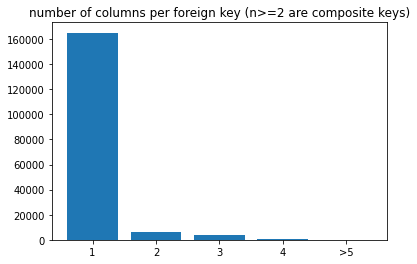

In [26]:
# composite fks per table
counter = collections.Counter(fk_counts_per_table)
most_common = counter.most_common()

most_common = sorted(most_common, key=lambda x: x[0])

cutoff = 4
most_common[cutoff] = (f">{most_common[cutoff][0]}", sum([kv[1] for kv in most_common[cutoff:]]))
most_common = most_common[0:cutoff+1]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("number of columns per foreign key (n>=2 are composite keys)")
plt.bar(x, y)
plt.show()

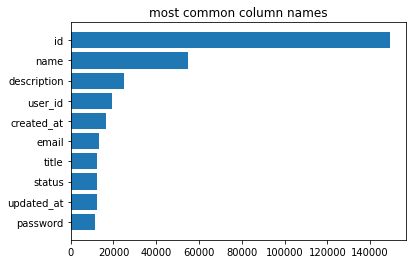

In [27]:
# column nmaes
counter = collections.Counter(column_names)
most_common = counter.most_common()

cutoff = 10
most_common = most_common[0:cutoff]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("most common column names")
plt.barh(x[::-1], y[::-1])
plt.show()

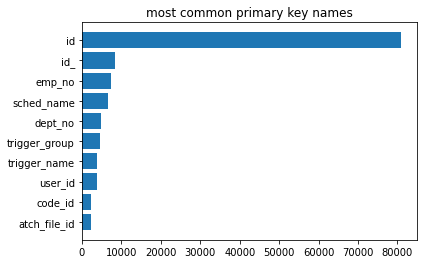

In [28]:
# primary keys names
counter = collections.Counter(pk_names)
most_common = counter.most_common()

cutoff = 10
most_common = most_common[0:cutoff]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("most common primary key names")
plt.barh(x[::-1], y[::-1])
plt.show()

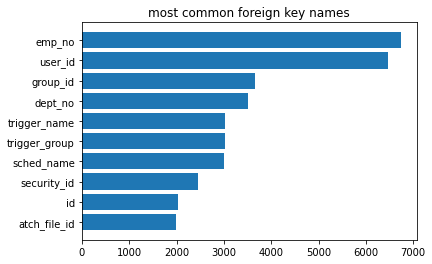

In [29]:
# foreign key names
counter = collections.Counter(fk_names_flat)
most_common = counter.most_common()

cutoff = 10
most_common = most_common[0:cutoff]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("most common foreign key names")
plt.barh(x[::-1], y[::-1])
plt.show()

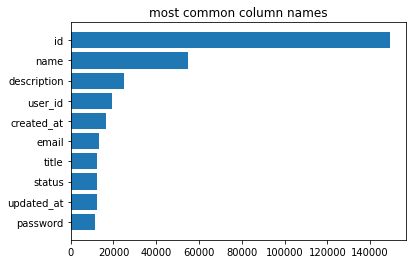

In [30]:
# column nmaes
counter = collections.Counter(column_names)
most_common = counter.most_common()

cutoff = 10
most_common = most_common[0:cutoff]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("most common column names")
plt.barh(x[::-1], y[::-1])
plt.show()

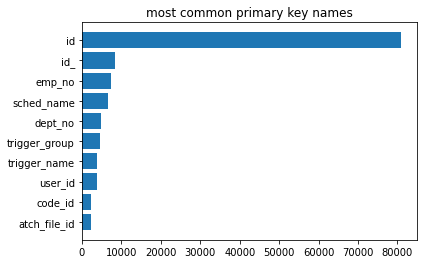

In [31]:
# primary keys names
counter = collections.Counter(pk_names)
most_common = counter.most_common()

cutoff = 10
most_common = most_common[0:cutoff]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("most common primary key names")
plt.barh(x[::-1], y[::-1])
plt.show()

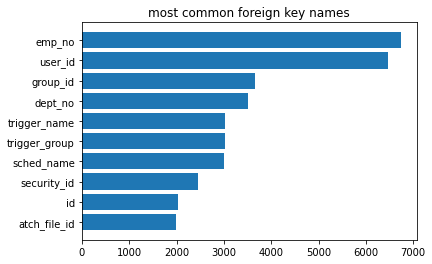

In [32]:
# foreign key names
counter = collections.Counter(fk_names_flat)
most_common = counter.most_common()

cutoff = 10
most_common = most_common[0:cutoff]
                          
x = [str(kv[0]) for kv in most_common]
y = [kv[1] for kv in most_common]

plt.title("most common foreign key names")
plt.barh(x[::-1], y[::-1])
plt.show()

In [33]:
# foreign keys reference names with table name
counter = collections.Counter(fk_full_ref_names)
print(len(counter))
counter.most_common()[:10]

37114


[('employees.emp_no', 6365),
 ('users.id', 4890),
 ('departments.dept_no', 3416),
 ('sec_currency.id', 3037),
 ('comtnauthorgroupinfo.group_id', 2885),
 ('qrtz_triggers.trigger_name', 2804),
 ('qrtz_triggers.trigger_group', 2804),
 ('sec_security.id', 2534),
 ('comtnauthorinfo.author_code', 2385),
 ('qrtz_triggers.sched_name', 2271)]

In [34]:
# foreign keys reference names
counter = collections.Counter(fk_ref_names_flat)
print(len(counter))
counter.most_common()[:10]

13619


[('id', 66454),
 ('emp_no', 6734),
 ('dept_no', 3507),
 ('group_id', 3261),
 ('trigger_name', 3032),
 ('trigger_group', 3032),
 ('sched_name', 3008),
 ('user_id', 2410),
 ('author_code', 2395),
 ('atch_file_id', 1989)]